# Hey, It's me <span style="color:blue;">"Ahmed Hussein Ahmed"</span> 
----
# Welcome to my latest project notebook

# I'm working on <span style="color:red; font-weight:bold;">'Churn_Modelling'</span> Dataset 
___

___


## 1. Dataset Exploration & Preprocessing

In [10]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv("P1_Churn_Modelling.csv")

print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [28]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [31]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [33]:
print(df.duplicated().sum())

0


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

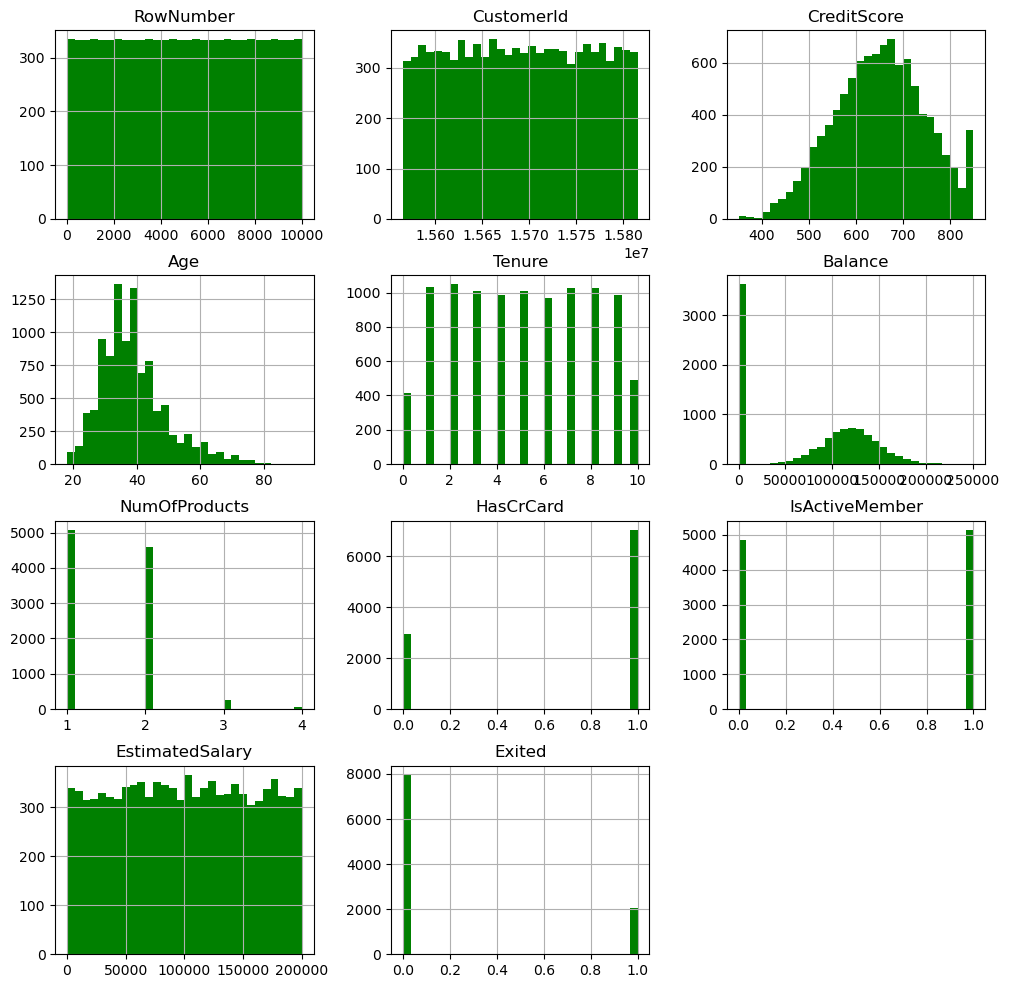

In [57]:
df.hist(figsize=(12,12),bins=30,color='green')
plt.show()

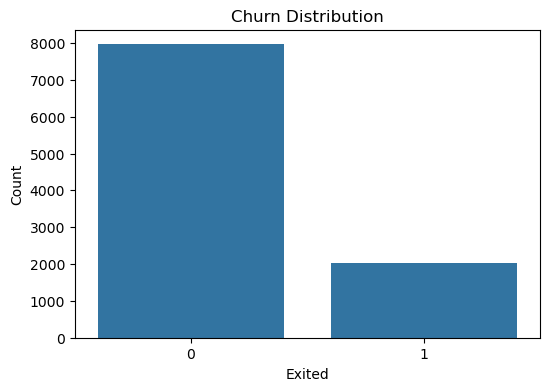

In [118]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.show()


In [72]:
from sklearn import preprocessing

In [74]:
# Label encoder 
le = preprocessing.LabelEncoder()

In [76]:
data = df.drop('CustomerId', axis=1)
data = data.drop('RowNumber', axis=1)
data = data.drop('Surname', axis=1)

In [78]:

encoded = data.apply(le.fit_transform)
data = encoded.values

In [123]:
X = data[:,:10]
y = data[:,10]

# 2. ML

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 2.1 Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)  # Increase max_iter if convergence issues occur
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [134]:
y_pred = model.predict(X_test_scaled)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.814
Confusion Matrix:
 [[1562   45]
 [ 327   66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.59      0.17      0.26       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000



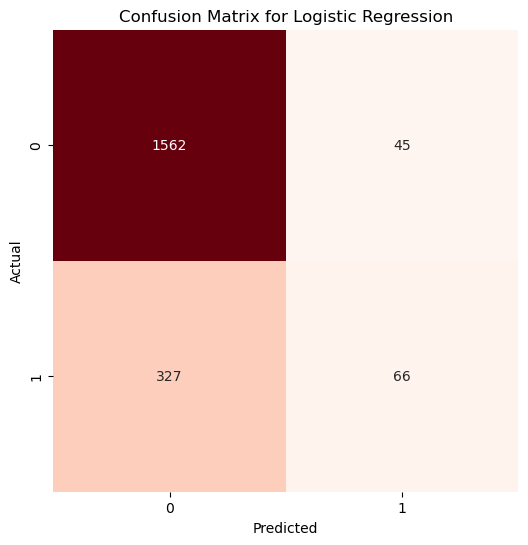

In [140]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)  # Get dictionary for easier access
results=[]
# Append results to the results list
results.append({
    "Model": 'Logistic Regression',
    "Accuracy": accuracy,
    "Precision": class_report['weighted avg']['precision'],  # Weighted average precision
    "Recall": class_report['weighted avg']['recall'],        # Weighted average recall
    "F1-Score": class_report['weighted avg']['f1-score'],    # Weighted average F1-score
    "Confusion Matrix": conf_matrix
})

In [156]:
from imblearn.over_sampling import SMOTE
# Create SMOTE instance
smote = SMOTE(random_state=172)

# Apply SMOTE to training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Original dataset shape:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Resampled dataset shape:", dict(zip(*np.unique(y_train_balanced, return_counts=True))))

Original dataset shape: {0: 6356, 1: 1644}
Resampled dataset shape: {0: 6356, 1: 6356}


In [182]:
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)  
model.fit(X_train_scaled, y_train_balanced) 

LogisticRegression()

In [184]:
 
y_pred = model.predict(X_test_scaled)  

In [186]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.728
Confusion Matrix:
 [[1231  376]
 [ 168  225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1607
           1       0.37      0.57      0.45       393

    accuracy                           0.73      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.73      0.75      2000



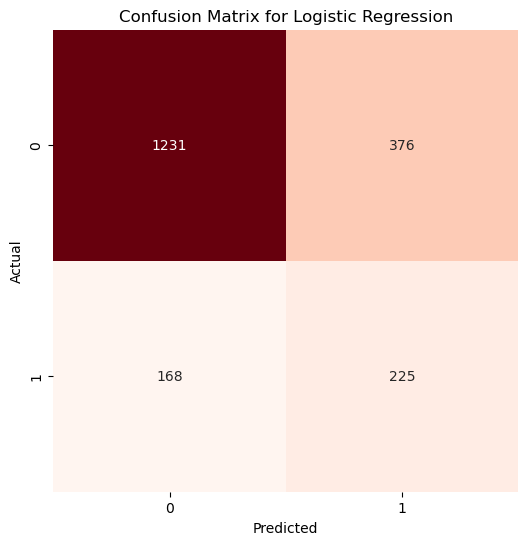

In [188]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Create SMOTE instance
smote = SMOTE(random_state=172)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [199]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=172)
model.fit(X_train_balanced, y_train_balanced)  # Random Forest can handle non-scaled data



RandomForestClassifier(random_state=172)

In [201]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8205
Confusion Matrix:
 [[1382  225]
 [ 134  259]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      1607
           1       0.54      0.66      0.59       393

    accuracy                           0.82      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



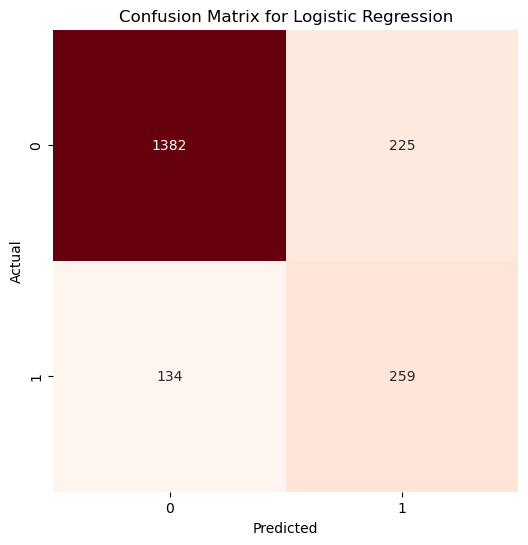

In [203]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest 

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


rf = RandomForestClassifier(random_state=172)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  
    scoring='f1',        
    n_jobs=-1,           
    verbose=2           
)

grid_search.fit(X_train_balanced, y_train_balanced)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=172),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [209]:

print("\nBest parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)



Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8530884603805513


In [211]:
print("\nBest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Best Model Evaluation:
Accuracy: 0.8155
Confusion Matrix:
 [[1375  232]
 [ 137  256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1607
           1       0.52      0.65      0.58       393

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.83      0.82      0.82      2000



In [215]:

if 'feature_names' in locals():  # If feature names are available
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': best_rf.feature_importances_
    }).sort_values('importance', ascending=False)
    print("\nFeature Importance:\n", feature_importance)

In [ ]:
feature_names = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 
                'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# KNN Model

In [272]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [11, 13, 15, 17, 19],  # Larger values
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    n_jobs=-1
)

grid_search_knn.fit(X_train_scaled, y_train_balanced)

print("\nBest KNN parameters:", grid_search_knn.best_params_)
print("Best score:", grid_search_knn.best_score_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print("\nKNN Model Performance:")
print("Training Score:", best_knn.score(X_train_scaled, y_train_balanced))
print("Test Score:", best_knn.score(X_test_scaled, y_test))
print("\nKNN Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))



Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Best score: 0.8396856213180502

KNN Model Performance:
Training Score: 1.0
Test Score: 0.78

KNN Model Evaluation:
Accuracy: 0.78
Confusion Matrix:
 [[1314  293]
 [ 147  246]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      1607
           1       0.46      0.63      0.53       393

    accuracy                           0.78      2000
   macro avg       0.68      0.72      0.69      2000
weighted avg       0.81      0.78      0.79      2000



# KNN Overfitting (Use bagging)

In [292]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

bag_knn = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=15),
    n_estimators=10,
    max_samples=0.8,
    random_state=42
)

bag_knn.fit(X_train_scaled, y_train_balanced)

y_pred_train = bag_knn.predict(X_train_scaled)
y_pred_test = bag_knn.predict(X_test_scaled)

train_score = accuracy_score(y_train_balanced, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print("Bagging Classifier Model Performance:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")
print(f"Difference (Train - Test): {train_score - test_score:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))

Bagging Classifier Model Performance:
Training Accuracy: 0.8315
Test Accuracy: 0.7765
Difference (Train - Test): 0.0550

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1607
           1       0.45      0.63      0.52       393

    accuracy                           0.78      2000
   macro avg       0.68      0.72      0.69      2000
weighted avg       0.81      0.78      0.79      2000


Confusion Matrix (Test Set):
[[1306  301]
 [ 146  247]]


# DT Model

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 5}

DT Model Performance:
Training Score: 0.8245752045311516
Test Score: 0.7825

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1607
           1       0.46      0.67      0.55       393

    accuracy                           0.78      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.82      0.78      0.80      2000



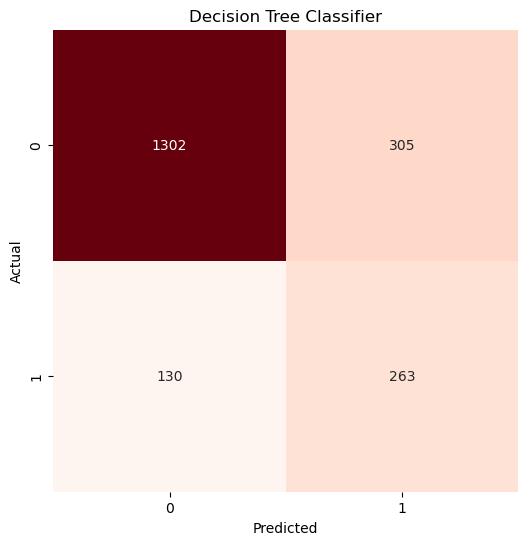

In [254]:

param_grid_dt = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

dt_model = DecisionTreeClassifier(random_state=172)
grid_search_dt = GridSearchCV(
    dt_model,
    param_grid_dt,
    cv=5,
    scoring=['accuracy', 'f1', 'precision', 'recall'],
    refit='f1',
    n_jobs=-1
)

grid_search_dt.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", grid_search_dt.best_params_)

best_dt_model = grid_search_dt.best_estimator_

y_pred_best = best_dt_model.predict(X_test)



print("\nDT Model Performance:")
print("Training Score:", best_dt_model.score(X_train_balanced, y_train_balanced))
print("Test Score:", best_dt_model.score(X_test, y_test))
print("\nClassification Report:")
print(classification_report(y_test, best_dt_model.predict(X_test)))

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# NB Model


GaussianNB Model Performance:
Training Accuracy: 0.7966
Test Accuracy: 0.7635
Difference (Train - Test): 0.0331

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.43      0.59      0.50       393

    accuracy                           0.76      2000
   macro avg       0.66      0.70      0.67      2000
weighted avg       0.80      0.76      0.78      2000


Confusion Matrix:
 [[1295  312]
 [ 161  232]]


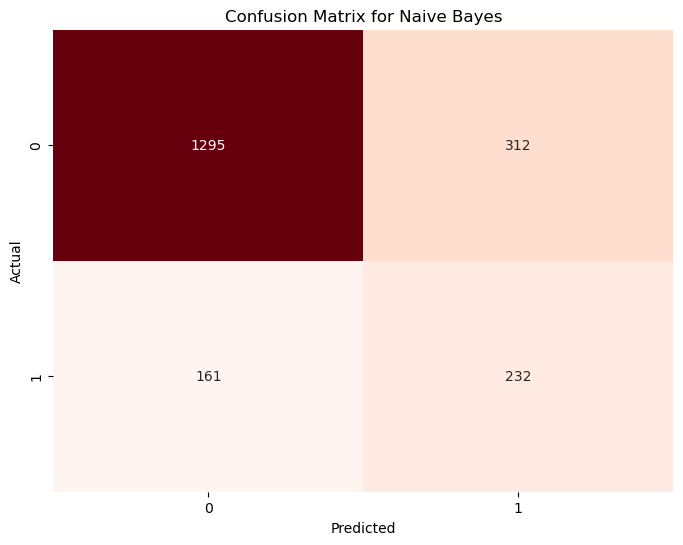

In [296]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

y_pred_train = nb_model.predict(X_train_balanced)
y_pred_test = nb_model.predict(X_test)

train_score = accuracy_score(y_train_balanced, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print("\nGaussianNB Model Performance:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")
print(f"Difference (Train - Test): {train_score - test_score:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




# Some Underfitting in NB 
# Use AdaBoost

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosted NB Model Performance:
Training Accuracy: 0.8216
Test Accuracy: 0.7860
Difference (Train - Test): 0.0356

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1607
           1       0.47      0.70      0.56       393

    accuracy                           0.79      2000
   macro avg       0.69      0.75      0.71      2000
weighted avg       0.83      0.79      0.80      2000



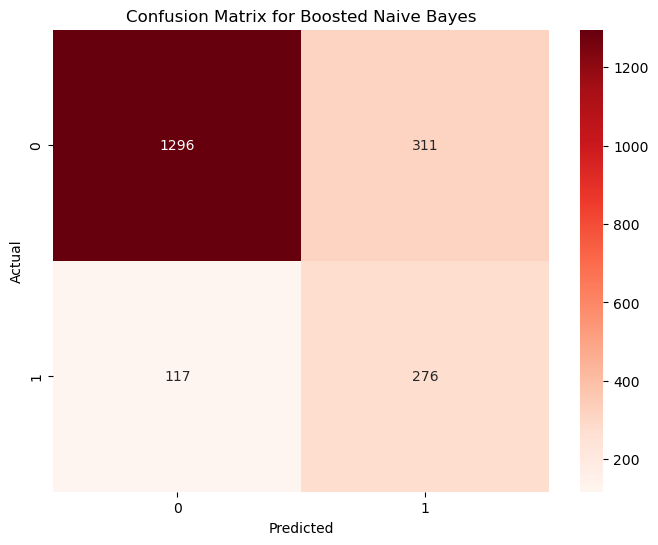

In [306]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

nb_base = GaussianNB()
boosted_nb = AdaBoostClassifier(
    estimator=nb_base,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

boosted_nb.fit(X_train_balanced, y_train_balanced)

y_pred_train = boosted_nb.predict(X_train_balanced)
y_pred_test = boosted_nb.predict(X_test)

train_score = accuracy_score(y_train_balanced, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print("Boosted NB Model Performance:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")
print(f"Difference (Train - Test): {train_score - test_score:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for Boosted Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# SVM Model

SVM Model Performance:
Training Accuracy: 0.8491
Test Accuracy: 0.8100
Difference (Train - Test): 0.0391

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1607
           1       0.51      0.68      0.58       393

    accuracy                           0.81      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.84      0.81      0.82      2000



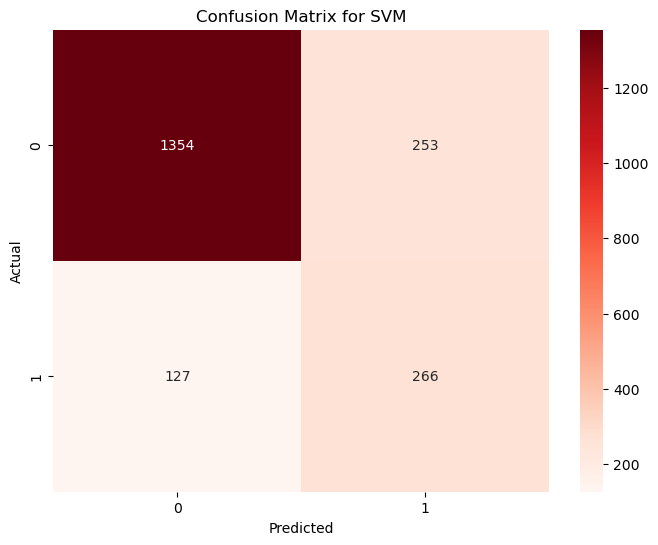

In [320]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train_scaled, y_train_balanced)

y_pred_train = svm.predict(X_train_scaled)
y_pred_test = svm.predict(X_test_scaled)

train_score = accuracy_score(y_train_balanced, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print("SVM Model Performance:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")
print(f"Difference (Train - Test): {train_score - test_score:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
